In [4]:
# Run this cell
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [5]:
# read dataset into data frame
df = pd.read_csv('winequality-red.csv')
# convert df to numpy array
data = df.to_numpy()
# X = matrix of all feature vectors
X = data[:, :-1]
# y = vector containing corresponding wine quality of all feature vectors
y = data[:, -1]

In [6]:
# split features into train and test
    # 80% training, 20% test
X_train_unsl, X_test_unsl, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# scale data using standard scaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_unsl)
X_test = scaler.transform(X_test_unsl)

<AxesSubplot:xlabel='quality', ylabel='count'>

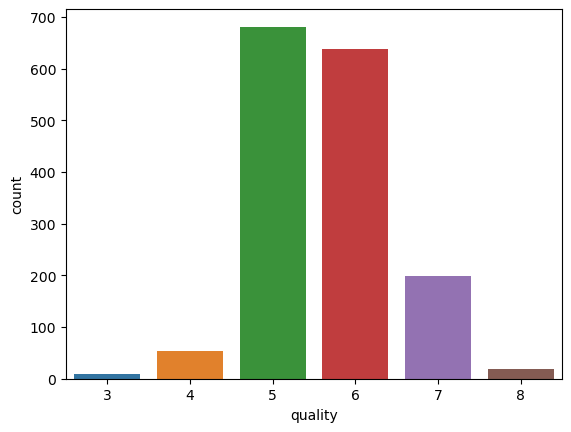

In [8]:
# check if dataset is imbalanced
sns.countplot(x=df['quality'])

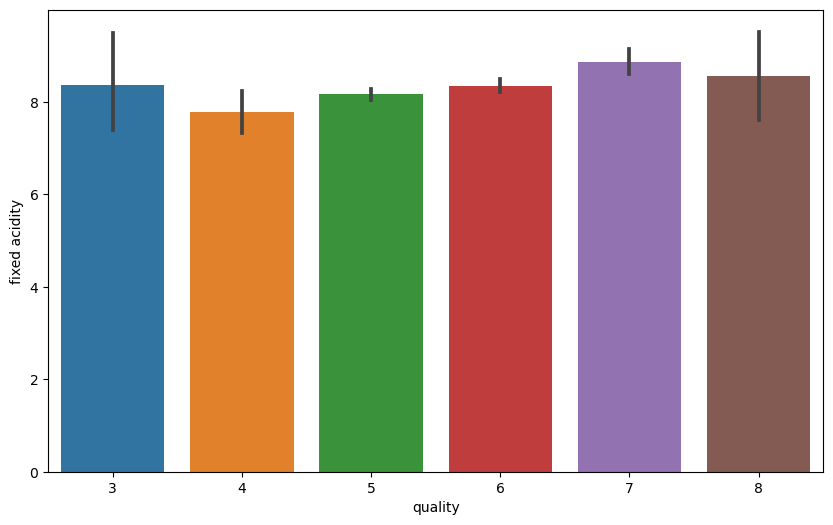

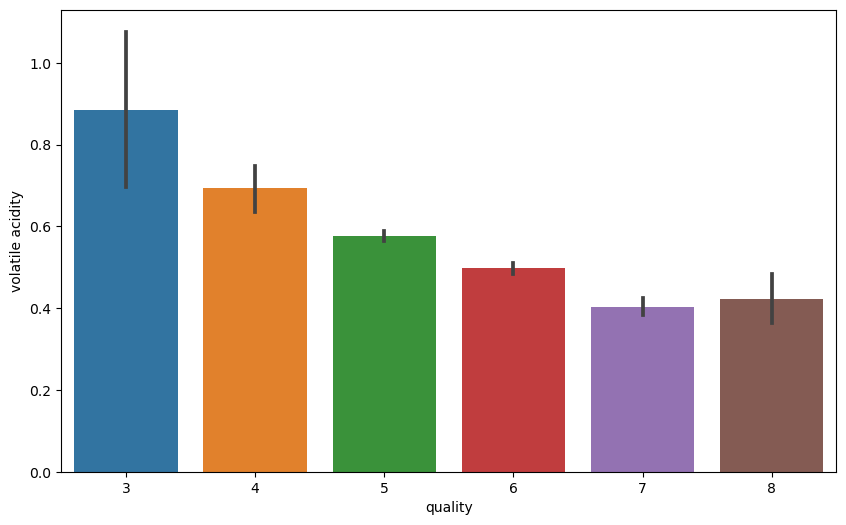

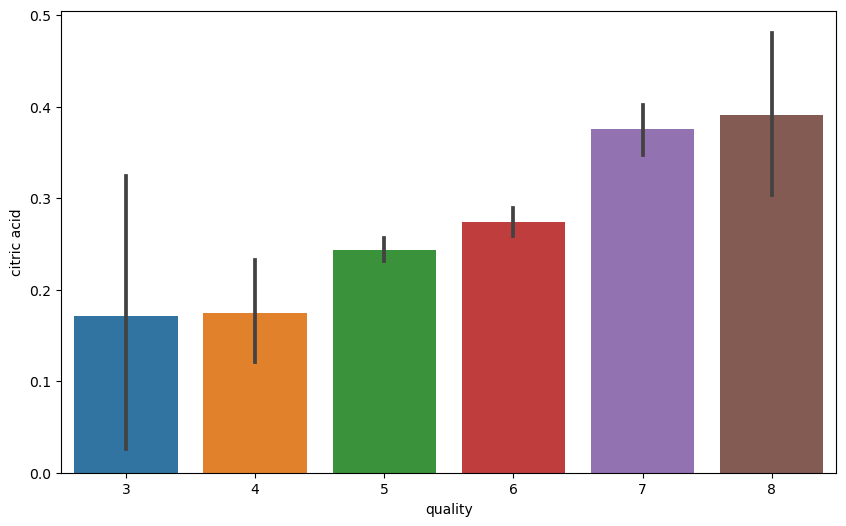

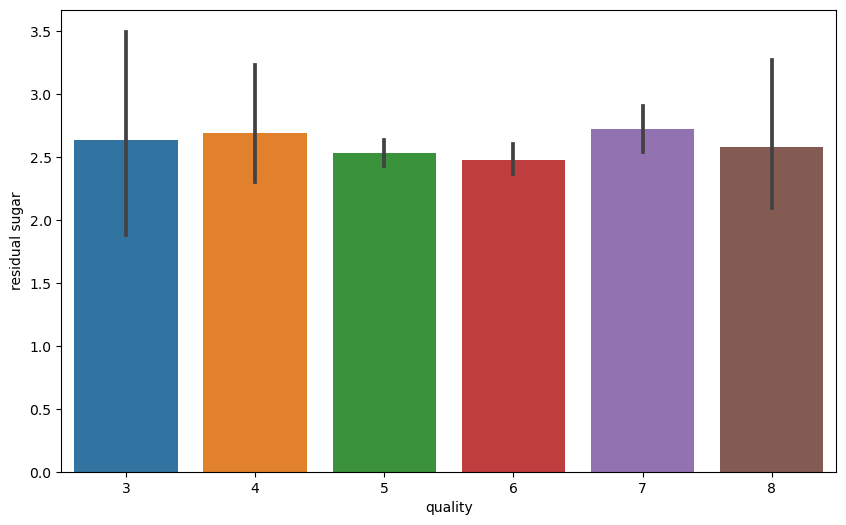

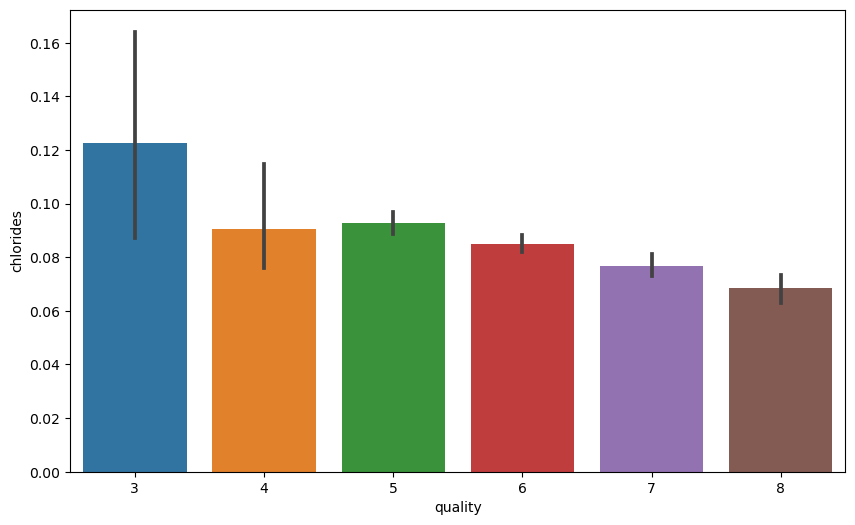

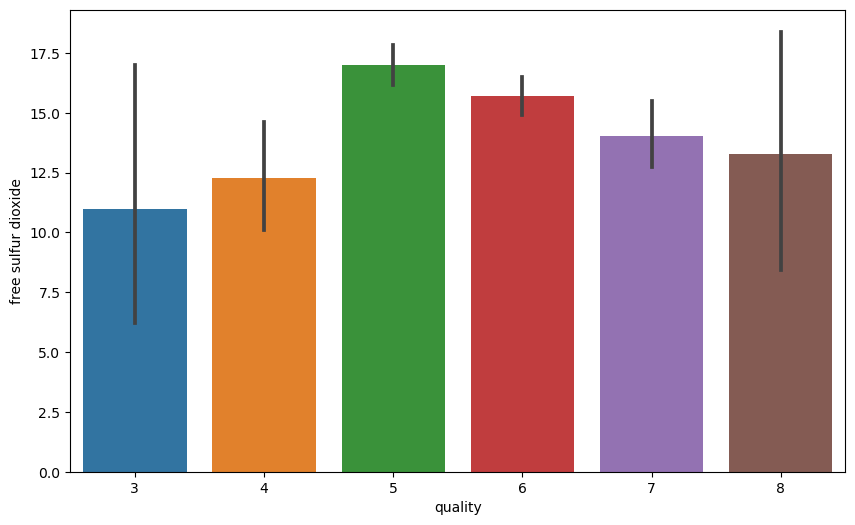

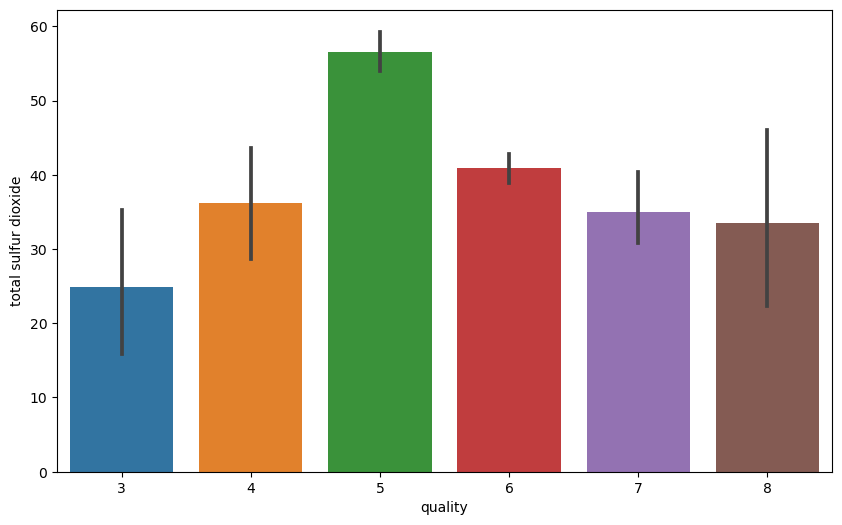

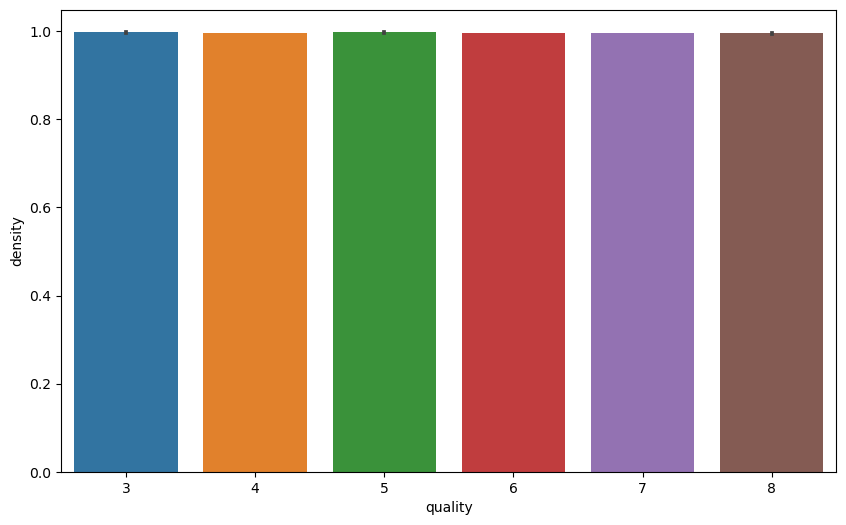

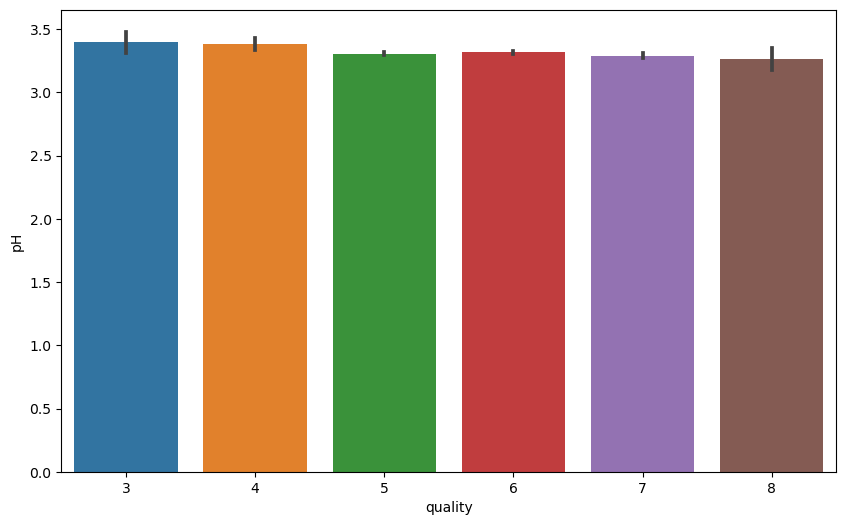

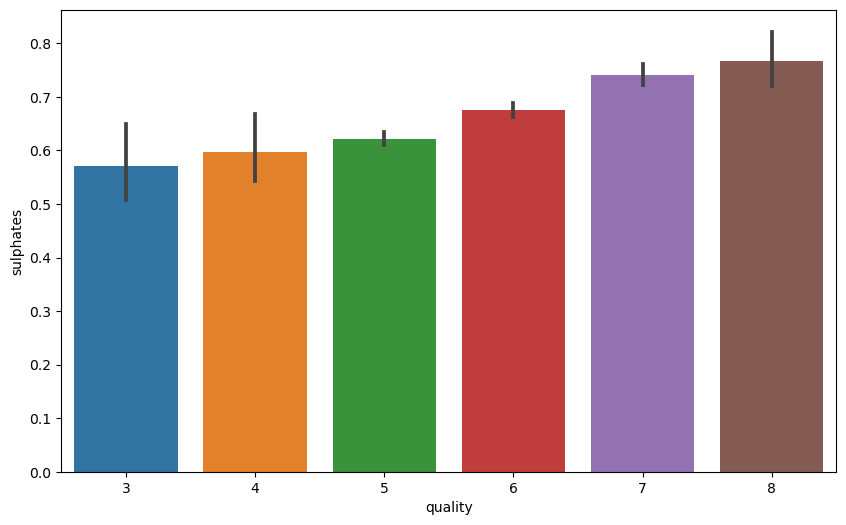

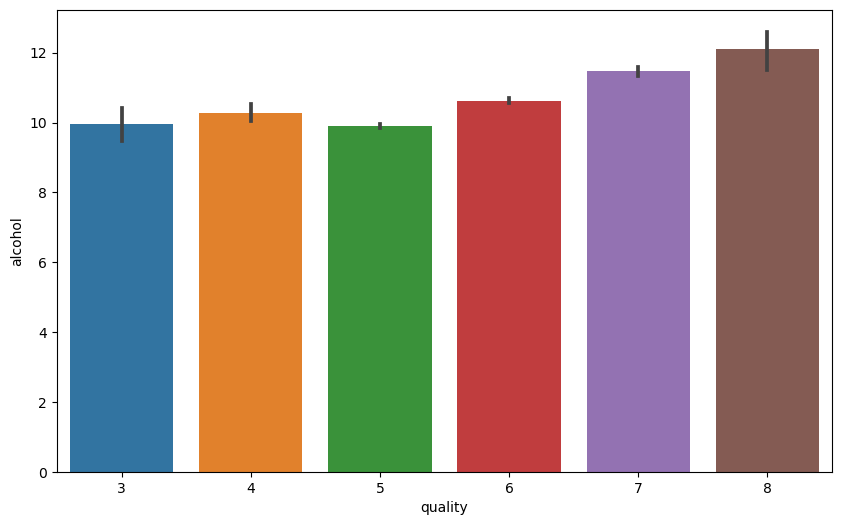

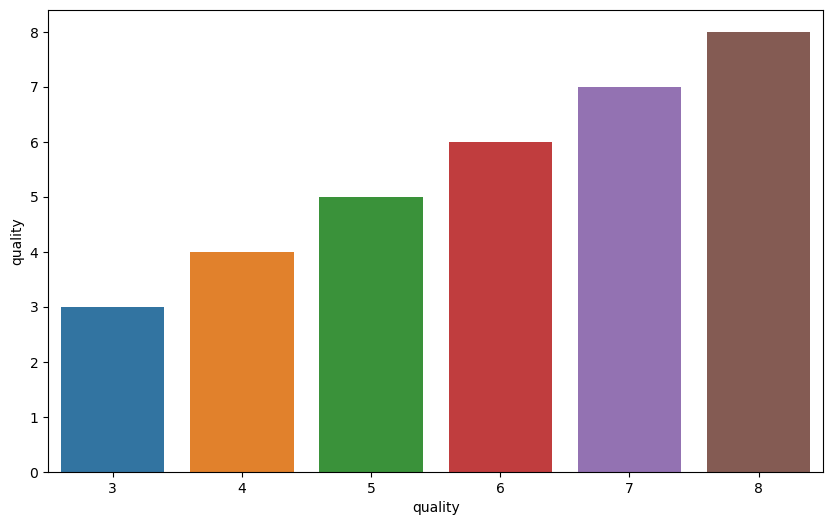

In [9]:
# plot the relationship between wine quality and individual scaled feature
cols = df.columns
for col in cols:
    fig = plt.figure(figsize = (10,6))
    sns.barplot(x = 'quality', y = col, data = df)

# no features have absolutely zero effect on quality- thus, include all features in dataset

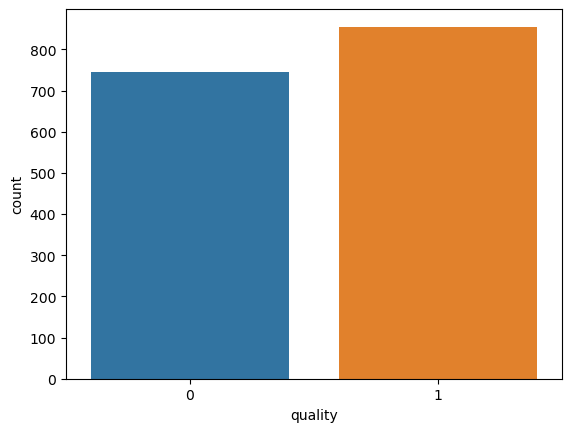

In [10]:
# dataset is clearly unbalanced- far more instances of 5 and 6 than anything
    # instead of predicting wine quality, predict if wine is "good" (quality > 5.5) or bad (quality < 5.5)
# df_balanced = pd.read_csv('winequality-red.csv')
    
bins = (2, 5.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()
sns.countplot(x=df['quality'])
    # dataset is now much more balanced

X_balanced = df.drop('quality', axis = 1)
y_balanced = df['quality']
X_train_unsl_balanced, X_test_unsl_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# normalize data/features
scaler_balanced = StandardScaler()
X_train_balanced = scaler_balanced.fit_transform(X_train_unsl_balanced)
X_test_balanced = scaler_balanced.transform(X_test_unsl_balanced)

In [11]:
# remove any outliers from data
from scipy import stats

# compute Z-score of each value in the column relative to column mean & standard dev
    # remove outliers that lie more than 3 standard deviations away from the mean
df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
data_no_outliers = df.to_numpy()
X_no_outliers = data_no_outliers[:, :-1]
y_no_outliers = data_no_outliers[:, -1]

print(X_no_outliers.shape)
# observe that no rows got removed- thus there were no outliers in the dataset

(1599, 11)


In [12]:
# count empty values in each column
print(df.isnull().sum())
# observe that there are no empty values in any data entries

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
